# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exercises

### Exercise - Regression

Consider the [🍫 diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) it contains data with $10$ features and a target value representing a quantitative measure of disease progression one year after baseline. Find the _best_ polynomial fit based on the test score for this dataset.

Perform exploratory data analysis, define a suitable performance metric and justify _all_ your choices.
Plot histograms of features distributions and correlation diagrams.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

In [2]:
dt = load_diabetes()
dt

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
data = pd.DataFrame(dt['data'], columns = dt['feature_names'])
data['target'] = dt['target']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
X=data[data.columns[0:-1]]
y=data[data.columns[-1]]

#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

df_train=pd.DataFrame(X_train, columns = data.columns[0:-1])
df_train['target']=y_train

df_test=pd.DataFrame(X_test, columns = data.columns[0:-1])
df_test['target']=y_test

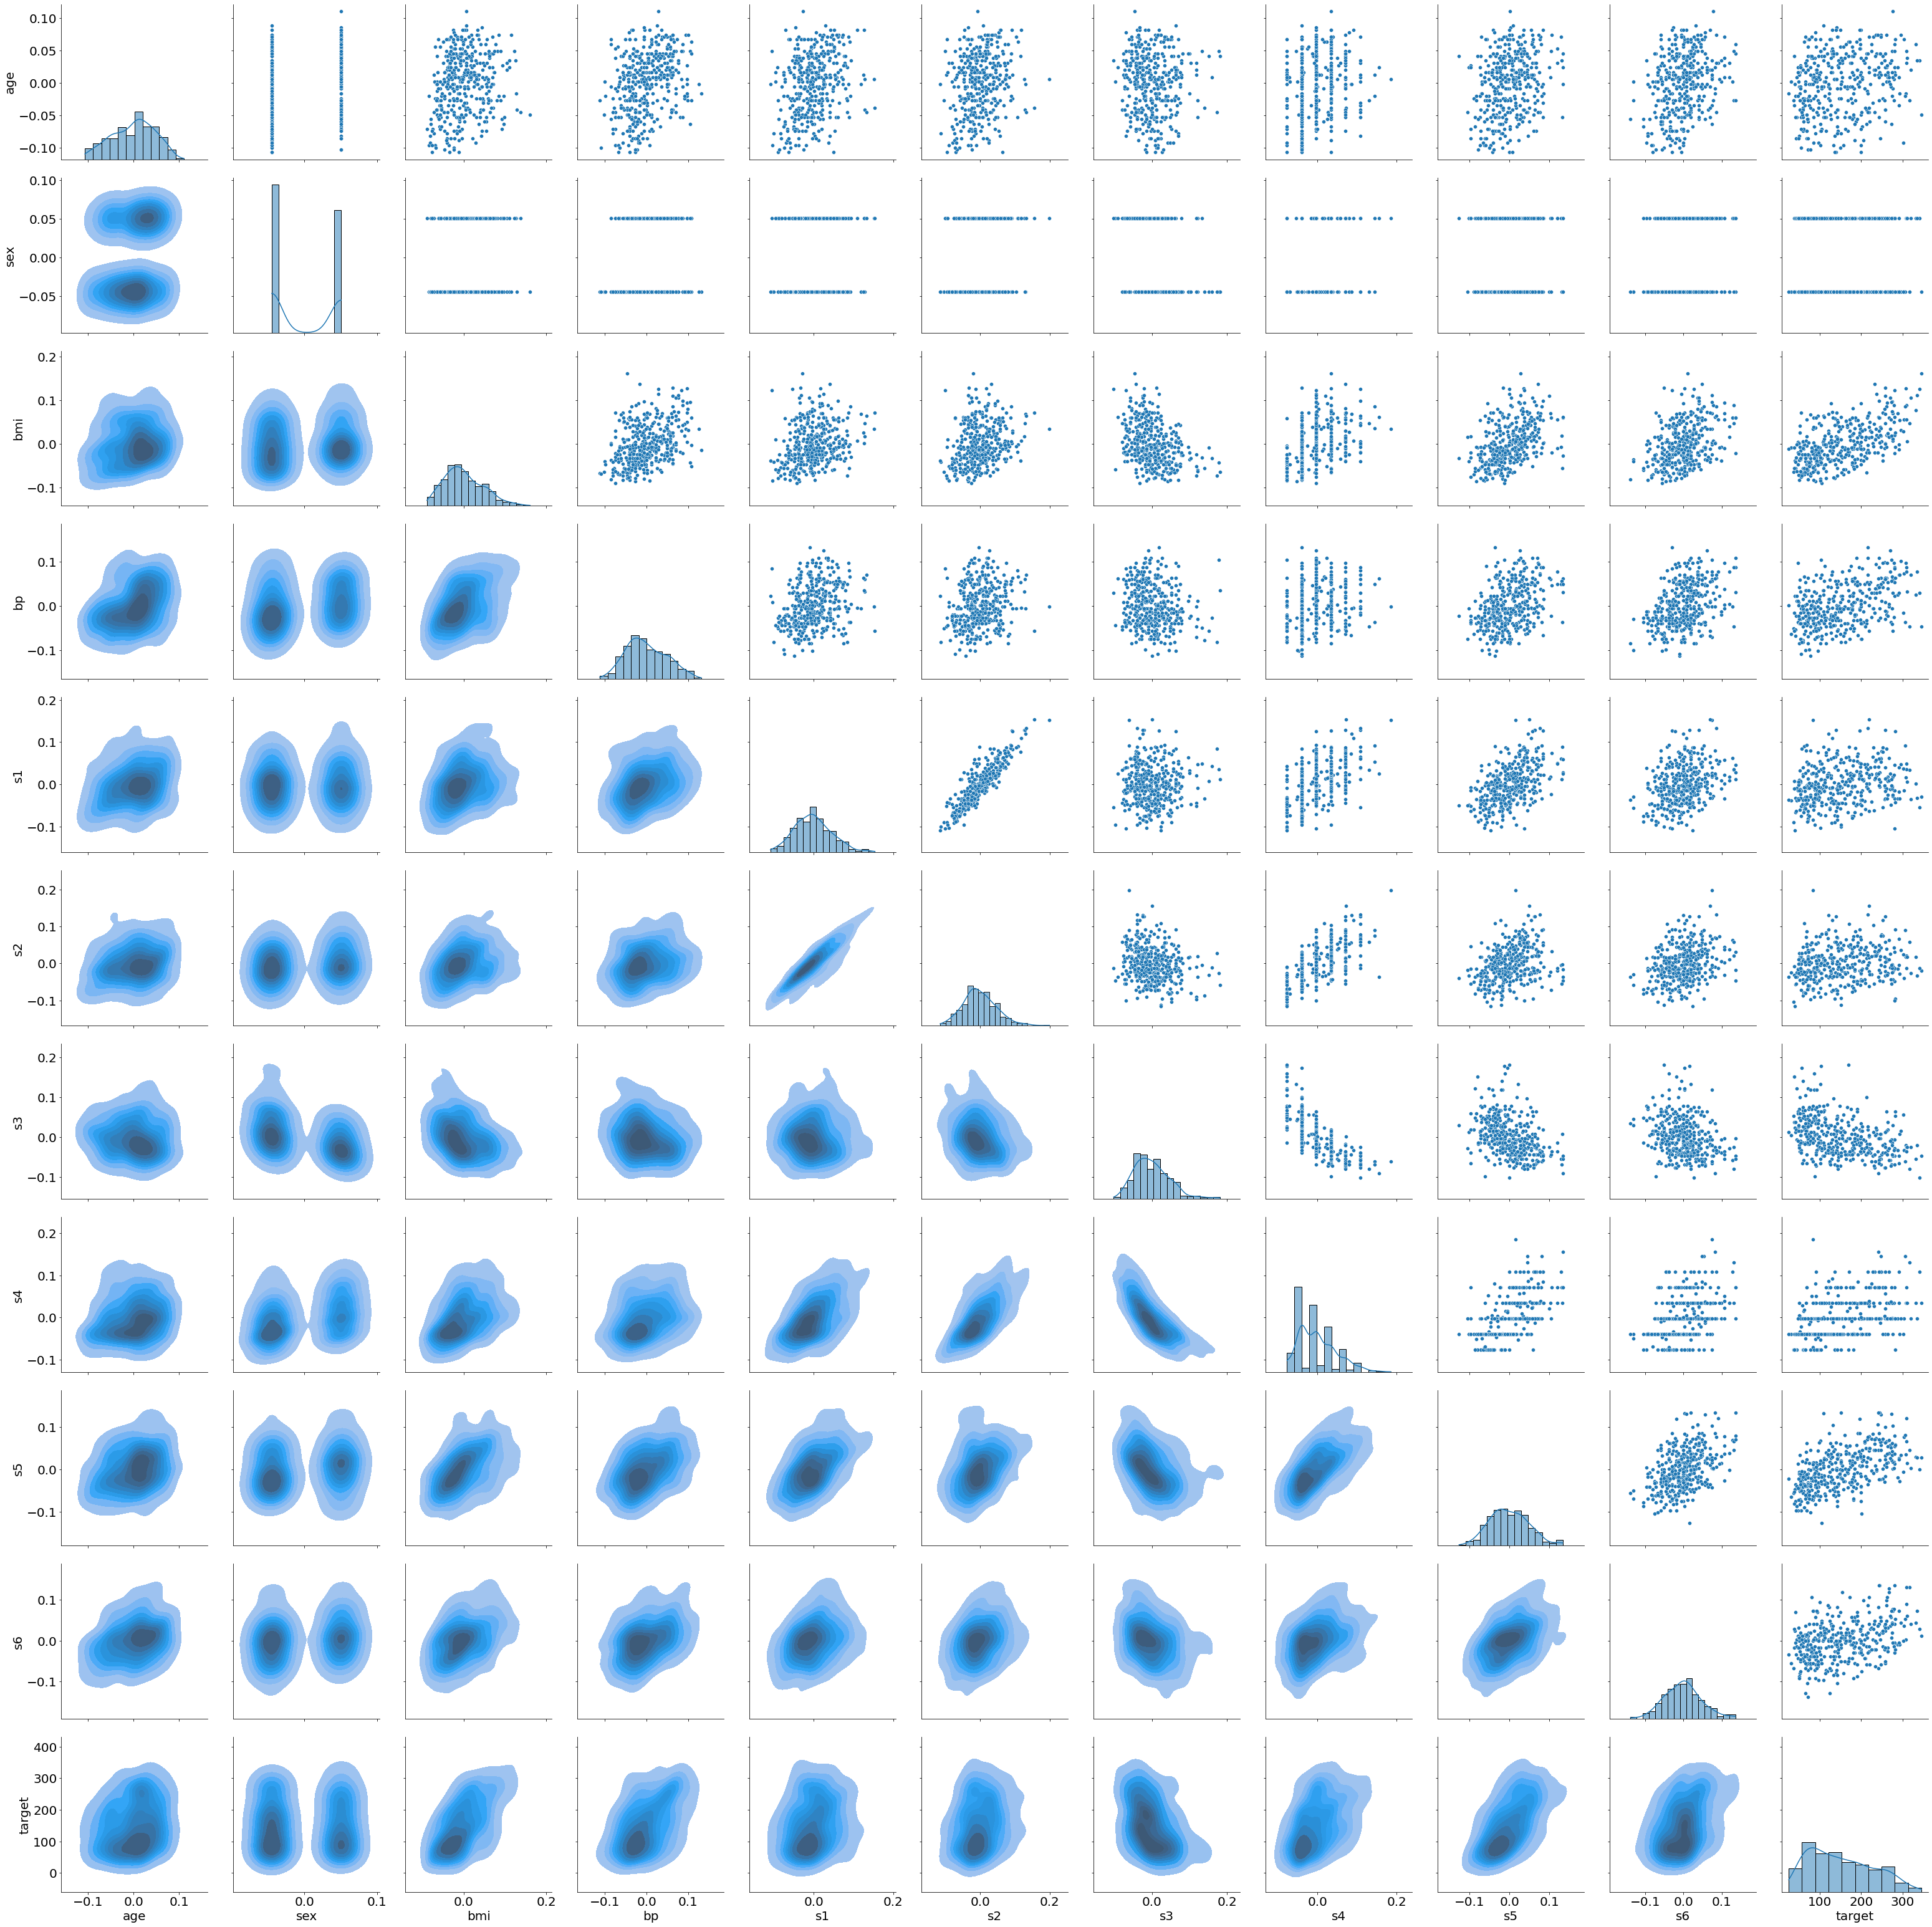

In [5]:
g = sns.PairGrid(df_train, height=4)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True);

<AxesSubplot:>

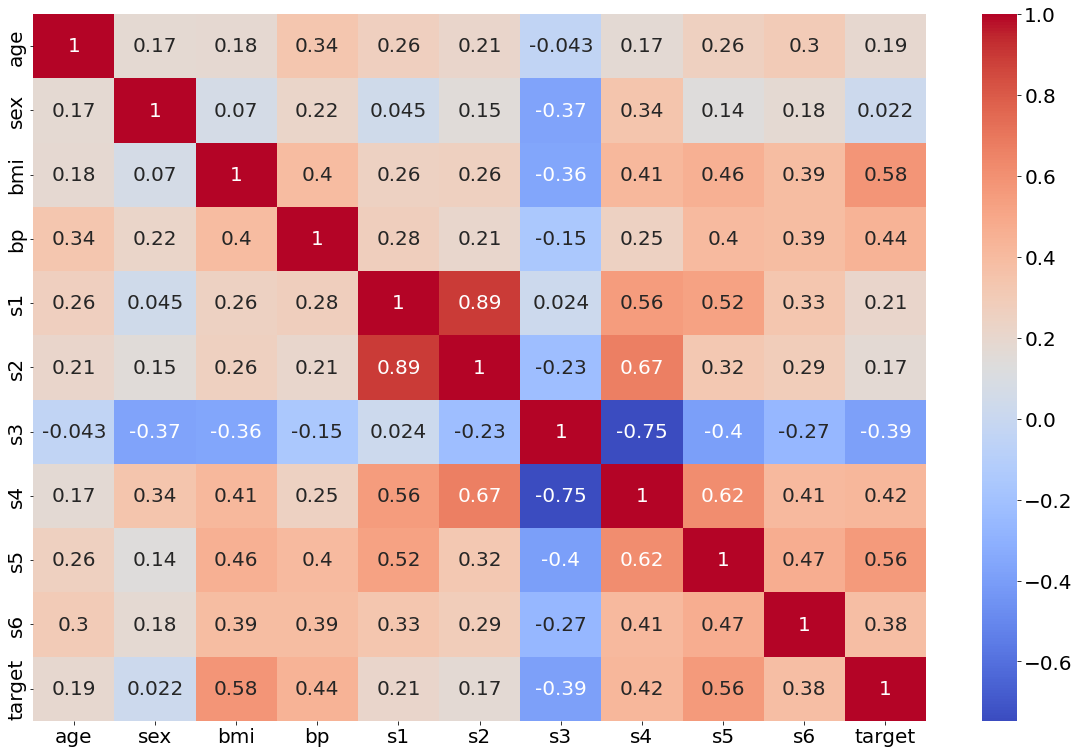

In [6]:
sns.heatmap(df_train.corr(), annot = True, cmap = 'coolwarm')

From the plots you can see how there is a good correlation with the various features, almost all above 0.3 except for 'age', 'sex', 's1' and 's2'.

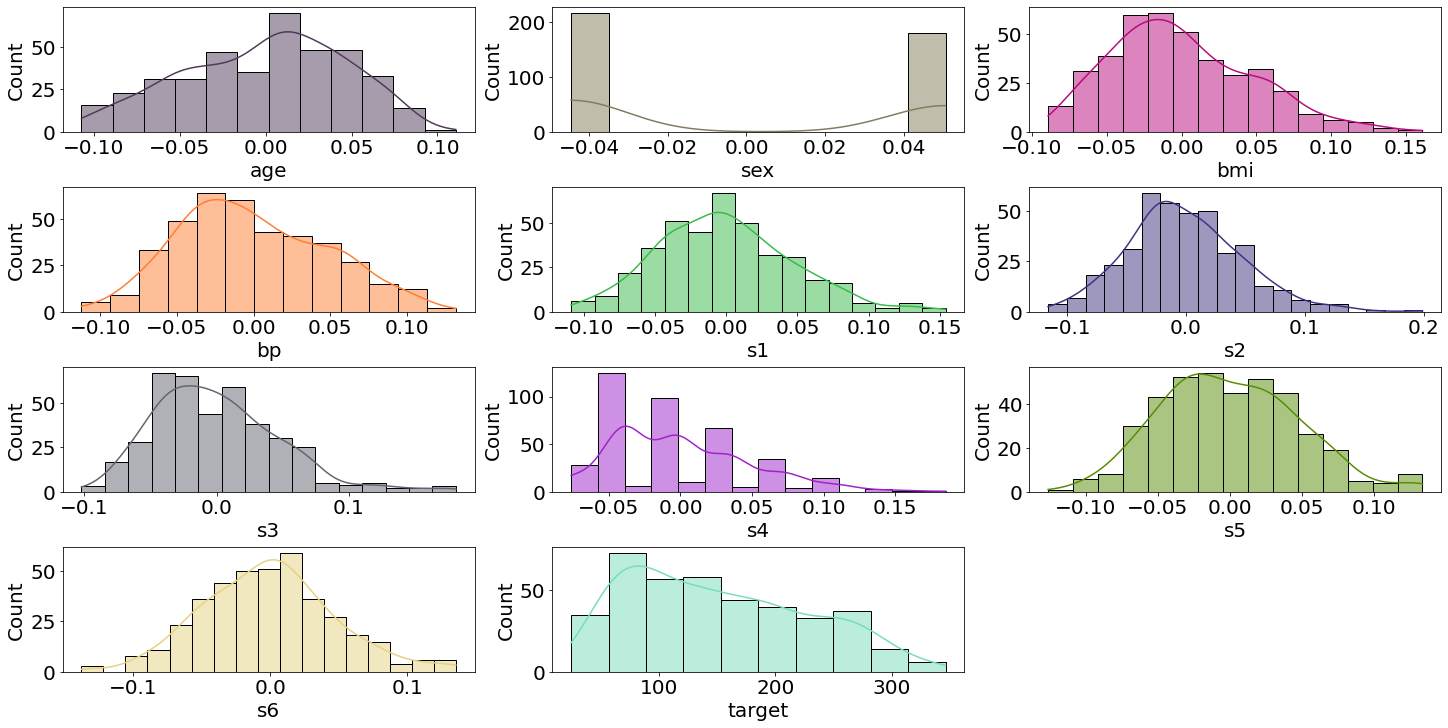

In [7]:
fig,axes = plt.subplots(4, 3, constrained_layout = True,figsize = (20,10))
for i,ax in enumerate(axes.ravel()):
    if i > 10:
        fig.delaxes(ax)
        continue
    rgb = np.random.rand(3,)
    sns.histplot( x = df_train.iloc[:,i], kde = True, color = rgb, ax = ax)

Data distribution was viewed to get an idea of their distribution

In [8]:
corr = df_train.corr().target
corr

age       0.188185
sex       0.021537
bmi       0.583508
bp        0.440617
s1        0.211095
s2        0.171855
s3       -0.388870
s4        0.423206
s5        0.556827
s6        0.384982
target    1.000000
Name: target, dtype: float64

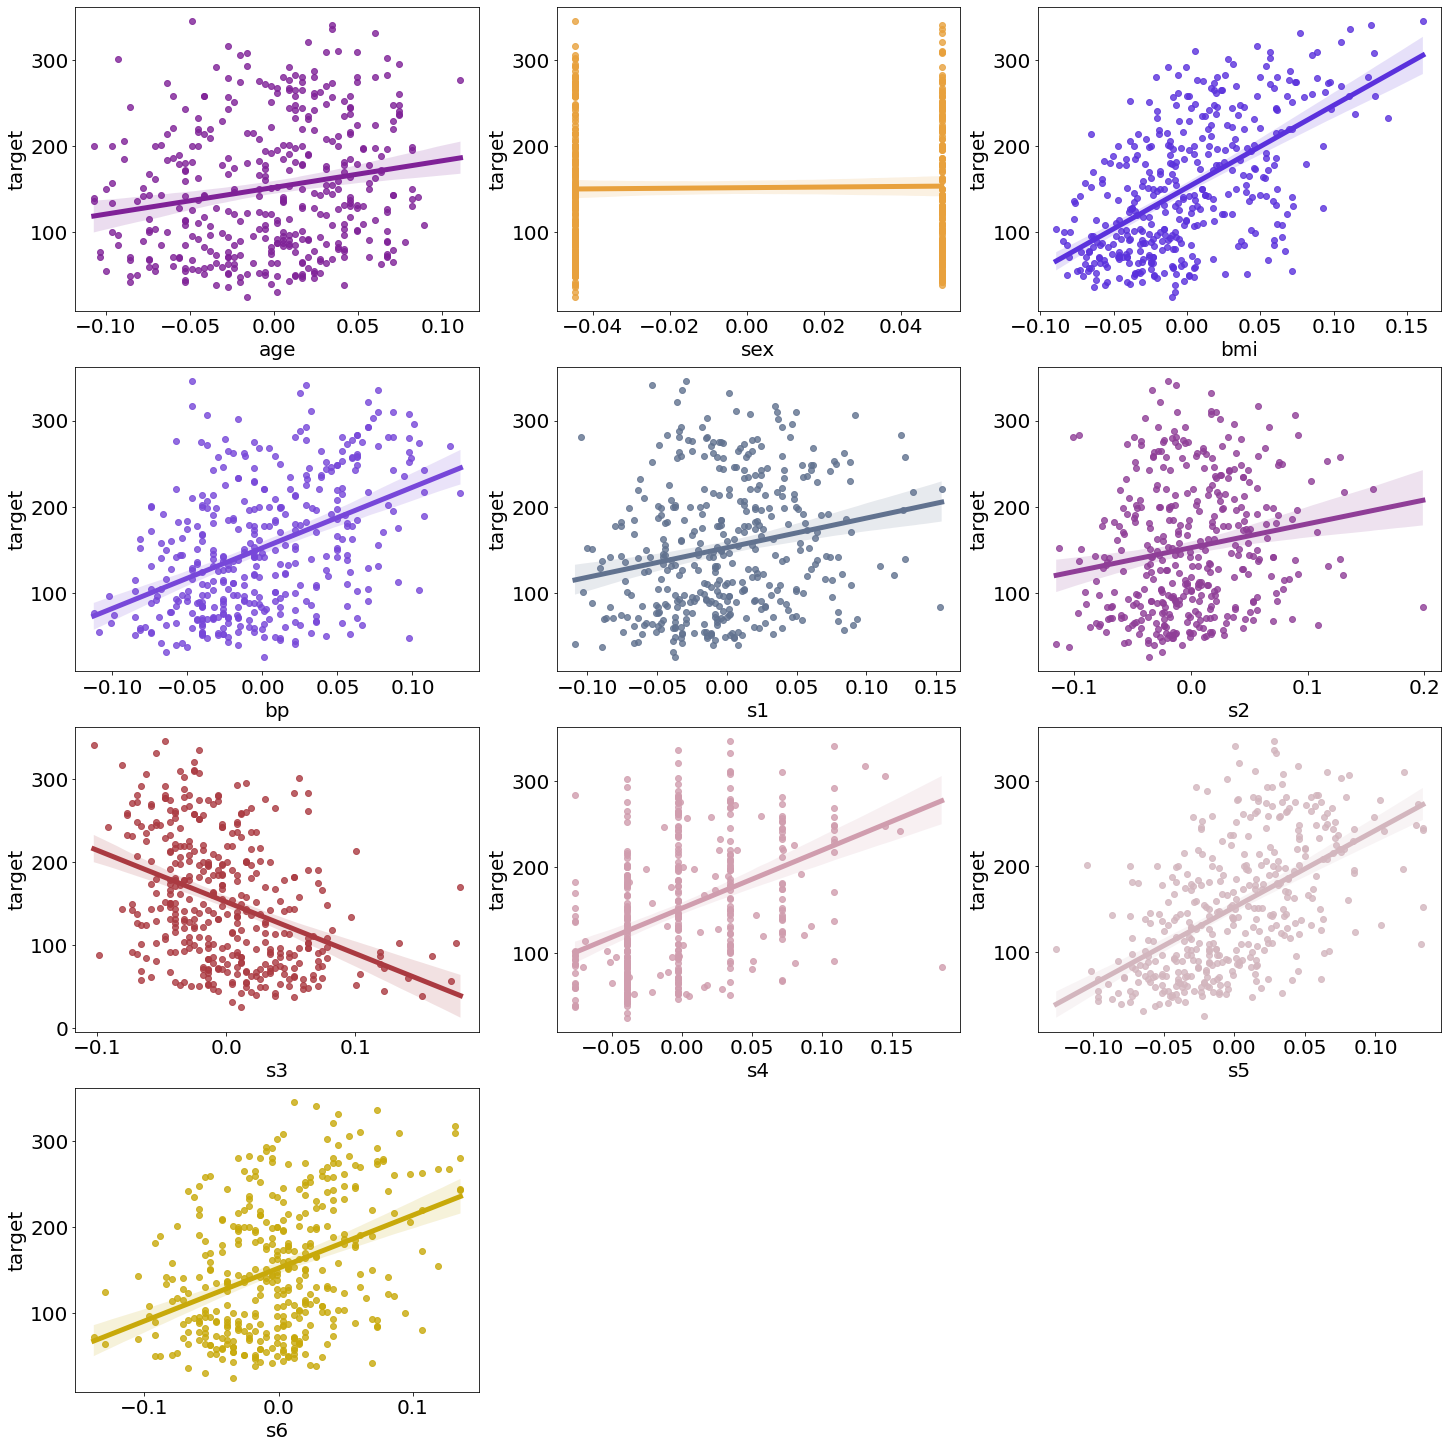

In [9]:
fig, axes = plt.subplots(4,3, constrained_layout = True, figsize=(20,20))
for i, ax in enumerate(axes.ravel()):
    if i >9:
        fig.delaxes(ax)
        continue
    rgb = np.random.rand(3,)
    sns.regplot(x = df_train[corr.index[i]], y = df_train[corr.index[10]], line_kws={'linewidth':5},color = rgb, ax = ax)

Viewing correlations and plotting the graphs

In [10]:
k=[i for i in range(1,5)]
scores=[]
degree=[]
rel_err=[]
mean_sqrt=[]
ass_err=[]
for i in k:
    poly = PolynomialFeatures(degree = i, include_bias = False)
    X_train_ = poly.fit_transform(X_train)
    X_test_ = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_, y_train)
    y_pred=model.predict(X_test_)
    rel=np.mean(abs((y_pred-y_test)/y_test))
    ass=np.mean(abs((y_pred-y_test)))
    mean=np.sqrt(mean_squared_error(y_pred, y_test))
    scores.append(model.score(X_test_, y_test))
    rel_err.append(rel)
    mean_sqrt.append(mean)
    ass_err.append(ass)
    degree.append(i)
    
print(f"\nConsidering a linear polynomial {degree[np.argmax(scores)]}\na score of{np.round(max(scores),3)*100}% is obtained" )

print(f"\nTo get the minimum error, equal to {np.round(min(rel_err),2)*100}%,\n(calculated as the average of relative errors)\nshould be used a polynomial of degree {degree[np.argmin(rel_err)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(mean_sqrt),2)},\n(calculated using the mean square error)\nshould be used a polynomial of degree {degree[np.argmin(mean_sqrt)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(ass_err),2)},\n(calculated using the mean absolute error)\nshould be used a polynomial of degree {degree[np.argmin(ass_err)]}" )



Considering a linear polynomial 1
a score of55.1% is obtained

To get the minimum error, equal to 33.0%,
(calculated as the average of relative errors)
should be used a polynomial of degree 2

To get the minimum error, equal to 52.38,
(calculated using the mean square error)
should be used a polynomial of degree 1

To get the minimum error, equal to 41.58,
(calculated using the mean absolute error)
should be used a polynomial of degree 1


The graphs already showed a linear correlation, but It was tested to make sure that a first degree polynomial was the right choice for the linear regression algorithm.

In [11]:
poly = PolynomialFeatures(degree = 1, include_bias = False)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_, y_train)
y_pred=model.predict(X_test_)
err_rel_lr=abs((y_pred-y_test)/y_test)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
k=[i for i in range(2,30) if i%2!=0]
dist=['euclidean','cosine','manhattan']

The best choice is using the distance cosine,
with k=13and a score equal to 61.35%

The relative error is equal to 33.0%
and the mean square error is equal to 48.62,
The absolut error is equal to 39.11


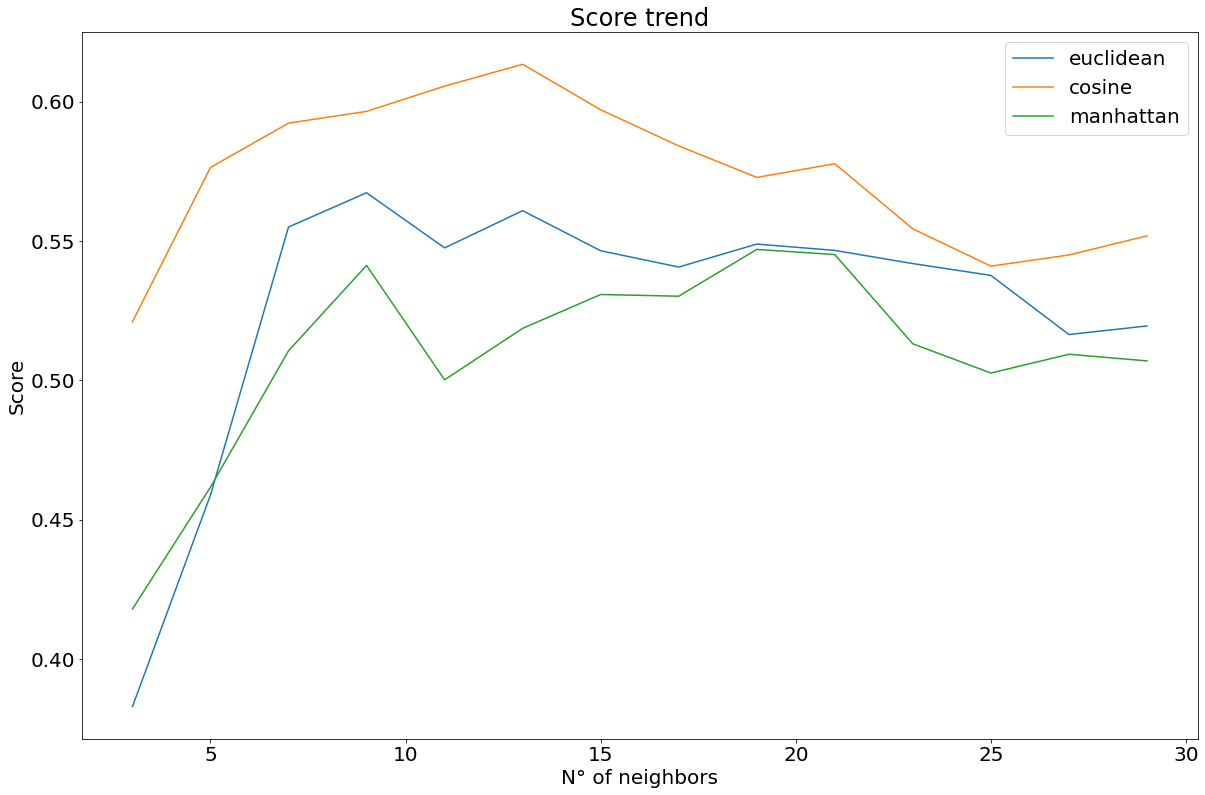

In [14]:
best_scores=[]
best_rel_err=[]
best_mean_sqrt=[]
best_k=[]
best_ass_err=[]
for j in dist:
    scores=[]
    rel_err=[]
    mean_sqrt=[]
    ass_err=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test, y_test))
        y_pred=knn.predict(X_test)
        rel=np.mean(abs((y_pred-y_test)/y_test))
        mean=np.sqrt(mean_squared_error(y_pred, y_test))
        ass=np.mean(abs((y_pred-y_test)))
        rel_err.append(rel)
        mean_sqrt.append(mean)
        ass_err.append(ass)
    
    best_scores.append(np.max(scores))
    best_rel_err.append(np.min(rel_err))
    best_ass_err.append(np.min(ass_err))
    best_mean_sqrt.append(np.min(mean_sqrt))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('N° of neighbors')  # Add an x-label to the axes.
plt.ylabel('Score')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f"The best choice is using the distance {dist[np.argmax(best_scores)]},\nwith k={best_k[np.argmax(best_scores)]}and a score equal to {np.round(np.max(best_scores)*100,2)}%")
print(f"\nThe relative error is equal to {np.round(min(best_rel_err),2)*100}%\nand the mean square error is equal to {np.round(min(best_mean_sqrt),2)},\nThe absolut error is equal to {np.round(min(best_ass_err),2)}")

For comparison, the knn algorithm was also used, to check if the Score of the model changes.
Indeed, it appears that the knn model is more accurate, by about 6% more, than the linear regression model.
The mean square error is lower for the knn than in the linear regression model.
While the average relative error doesn't seem to vary much.

In [15]:
knn = KNeighborsRegressor(n_neighbors=13, metric='cosine')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
err_rel_knn=abs((y_pred-y_test)/y_test)

KNN score = 0.5616401122324619
KNN best parameters = {'metric': 'cosine', 'n_neighbors': 25, 'weights': 'distance'}


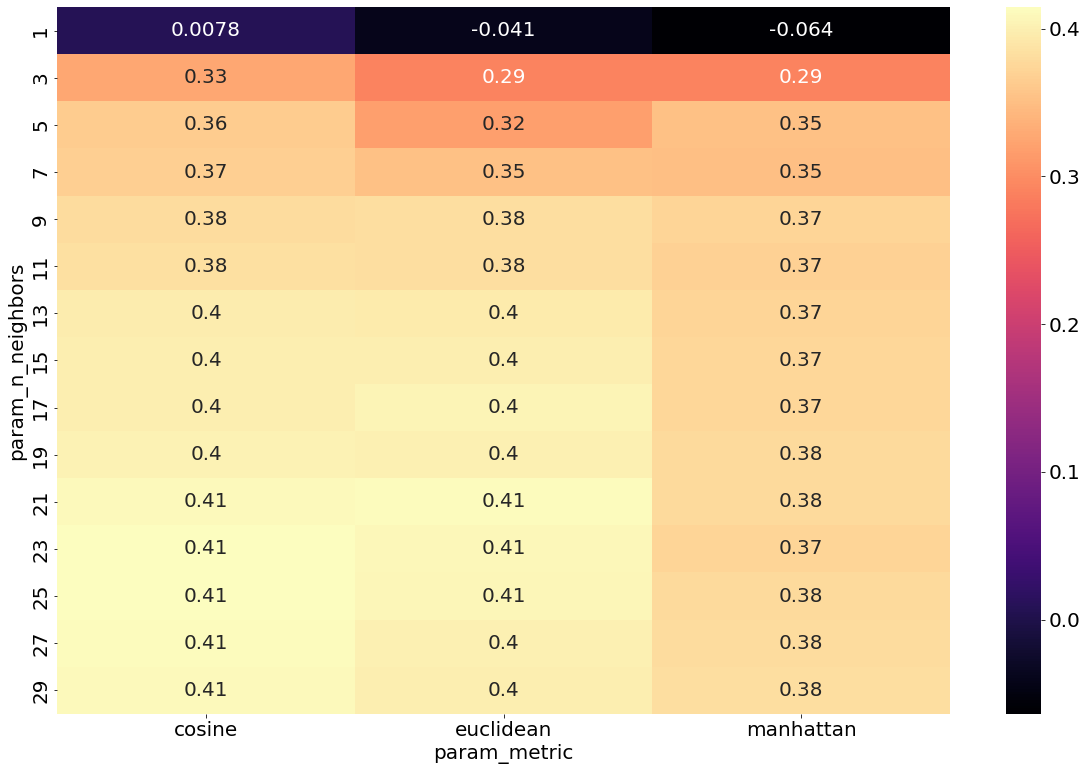

In [16]:
parameters = {'n_neighbors':[i for i in range(1,30) if i%2!=0],
              'weights':['uniform', 'distance'],
              'metric':['euclidean','manhattan', 'cosine']}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters) 
grid.fit(X_train, y_train)
print('KNN score =', grid.best_estimator_.score(X_test, y_test))
print('KNN best parameters =', grid.best_params_)

hmknn = pd.pivot_table(pd.DataFrame(grid.cv_results_),
									values='mean_test_score',
									index='param_n_neighbors',
									columns='param_metric')

sns.heatmap(hmknn, cmap = 'magma', annot = True)

#Calculation of the data deviations from the model
err_knn = (grid.predict(X_test) - y_test)/y_test

The gridsearch was used to check which are the best parameters to use for the knn model, the result is that with the previous code I obtained different parameters and above all a greater Score than searching for parameters through the gridsearch.

To try to improve the forecast, the data was changed. each column was multiplied by the corresponding correlation with the target column, then all the products were added up and a new column was obtained.
Then the models used previously were used again to check whether this leads to an improvement or not.

In [17]:
corr=data.corr().target[:-1]
data_corr=X*corr
data.drop('target', axis = 1, inplace = True)
data['sum']=data_corr.age+data_corr.sex+data_corr.bmi+data_corr.bp+data_corr.s1+data_corr.s2+data_corr.s3+data_corr.s4+data_corr.s5+data_corr.s6
data['target']=y

In [18]:
X=data[data.columns[0:-1]]
y=data[data.columns[-1]]

#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

df_train=pd.DataFrame(X_train, columns = data.columns[0:-1])
df_train['target']=y_train

df_test=pd.DataFrame(X_test, columns = data.columns[0:-1])
df_test['target']=y_test

In [19]:
k=[i for i in range(1,5)]
scores=[]
degree=[]
rel_err=[]
mean_sqrt=[]
ass_err=[]
for i in k:
    poly = PolynomialFeatures(degree = i, include_bias = False)
    X_train_ = poly.fit_transform(X_train)
    X_test_ = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_, y_train)
    y_pred=model.predict(X_test_)
    rel=np.mean(abs((y_pred-y_test)/y_test))
    ass=np.mean(abs((y_pred-y_test)))
    mean=np.sqrt(mean_squared_error(y_pred, y_test))
    scores.append(model.score(X_test_, y_test))
    rel_err.append(rel)
    mean_sqrt.append(mean)
    ass_err.append(ass)
    degree.append(i)
    
print(f"\nConsidering a linear polynomial {degree[np.argmax(scores)]}\na score of {np.round(max(scores),3)*100}% is obtained" )

print(f"\nTo get the minimum error, equal to {np.round(min(rel_err),2)*100}%,\n(calculated as the average of relative errors)\nshould be used a polynomial of degree {degree[np.argmin(rel_err)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(mean_sqrt),2)},\n(calculated using the mean square error)\nshould be used a polynomial of degree {degree[np.argmin(mean_sqrt)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(ass_err),2)},\n(calculated using the mean absolute error)\nshould be used a polynomial of degree {degree[np.argmin(ass_err)]}" )


Considering a linear polynomial 1
a score of 55.1% is obtained

To get the minimum error, equal to 33.0%,
(calculated as the average of relative errors)
should be used a polynomial of degree 2

To get the minimum error, equal to 52.38,
(calculated using the mean square error)
should be used a polynomial of degree 1

To get the minimum error, equal to 41.58,
(calculated using the mean absolute error)
should be used a polynomial of degree 1


With the linear regression model there does not seem to be any improvements or worsening, indeed the results seem unchanged!

In [20]:
poly = PolynomialFeatures(degree = 1, include_bias = False)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_, y_train)
y_pred=model.predict(X_test_)
err_rel_lr_corr=abs((y_pred-y_test)/y_test)

In [21]:
k=[i for i in range(2,30) if i%2!=0]
dist=['euclidean','cosine','manhattan']

The best choice is using the distance cosine,
with k=9and a score equal to 64.04%

The relative error is equal to 32.0%
and the mean square error is equal to 46.9,
The absolut error is equal to 36.48


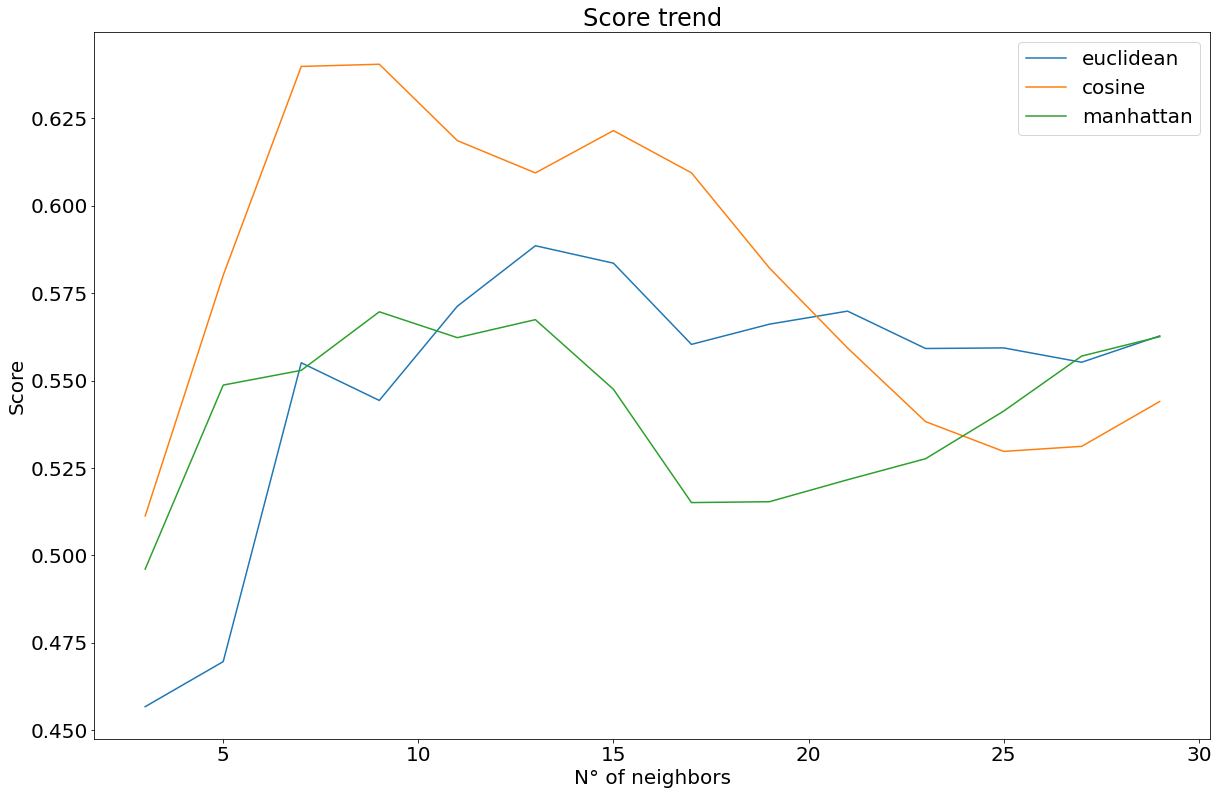

In [22]:
best_scores=[]
best_rel_err=[]
best_mean_sqrt=[]
best_k=[]
best_ass_err=[]
for j in dist:
    scores=[]
    rel_err=[]
    mean_sqrt=[]
    ass_err=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test, y_test))
        y_pred=knn.predict(X_test)
        rel=np.mean(abs((y_pred-y_test)/y_test))
        mean=np.sqrt(mean_squared_error(y_pred, y_test))
        ass=np.mean(abs((y_pred-y_test)))
        rel_err.append(rel)
        mean_sqrt.append(mean)
        ass_err.append(ass)
    
    best_scores.append(np.max(scores))
    best_rel_err.append(np.min(rel_err))
    best_ass_err.append(np.min(ass_err))
    best_mean_sqrt.append(np.min(mean_sqrt))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('N° of neighbors')  # Add an x-label to the axes.
plt.ylabel('Score')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f"The best choice is using the distance {dist[np.argmax(best_scores)]},\nwith k={best_k[np.argmax(best_scores)]}and a score equal to {np.round(np.max(best_scores)*100,2)}%")
print(f"\nThe relative error is equal to {np.round(min(best_rel_err),2)*100}%\nand the mean square error is equal to {np.round(min(best_mean_sqrt),2)},\nThe absolut error is equal to {np.round(min(best_ass_err),2)}")

The knn model seems to show a slight improvement compared to the previous one, in fact the Score is increased even if slightly, while the errors are lower.

In [23]:
knn = KNeighborsRegressor(n_neighbors=9, metric='cosine')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
err_rel_knn_corr=abs((y_pred-y_test)/y_test)

KNN score = 0.5585575977637011
KNN best parameters = {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}


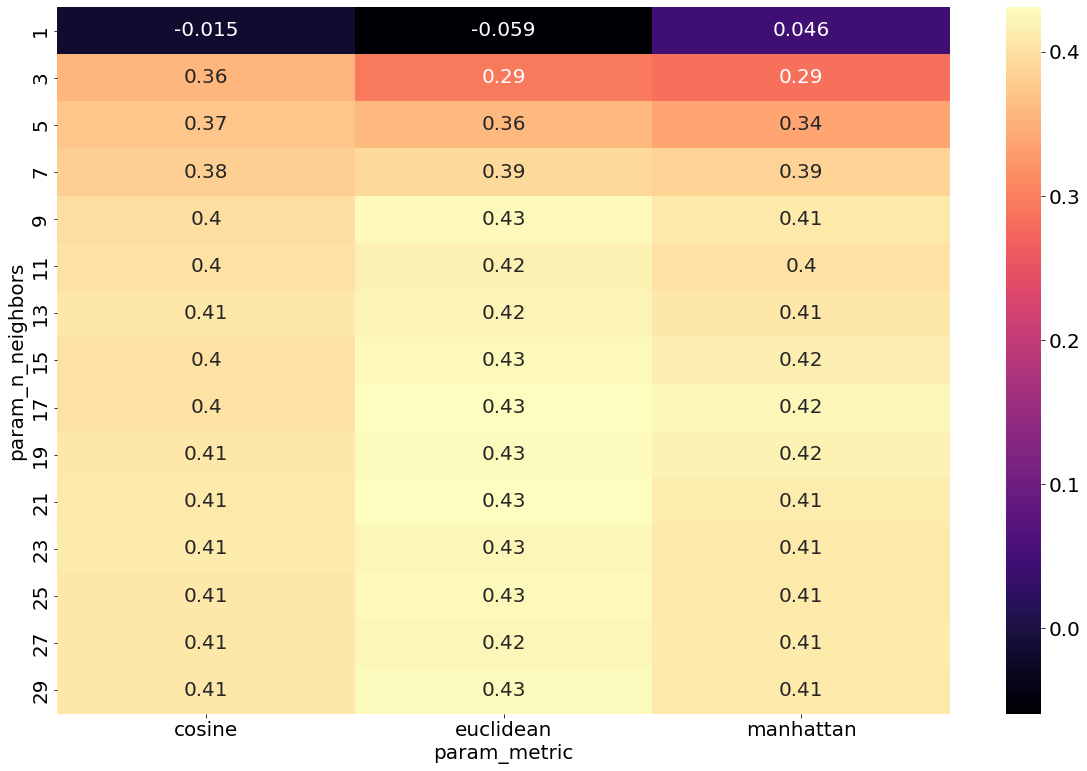

In [24]:
parameters = {'n_neighbors':[i for i in range(1,30) if i%2!=0],
              'weights':['uniform', 'distance'],
              'metric':['euclidean','manhattan', 'cosine']}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters) 
grid.fit(X_train, y_train)
print('KNN score =', grid.best_estimator_.score(X_test, y_test))
print('KNN best parameters =', grid.best_params_)

hmknn = pd.pivot_table(pd.DataFrame(grid.cv_results_),
									values='mean_test_score',
									index='param_n_neighbors',
									columns='param_metric')

sns.heatmap(hmknn, cmap = 'magma', annot = True)

#Calculation of the data deviations from the model
err_knn_corr = (grid.predict(X_test) - y_test)/y_test

Again there seems to be a discrepancy, as before. Furthermore, in this case, the Score is lower than that calculated previously, even if slightly.

Text(0.5, 1.0, 'Relative Errors Distribution')

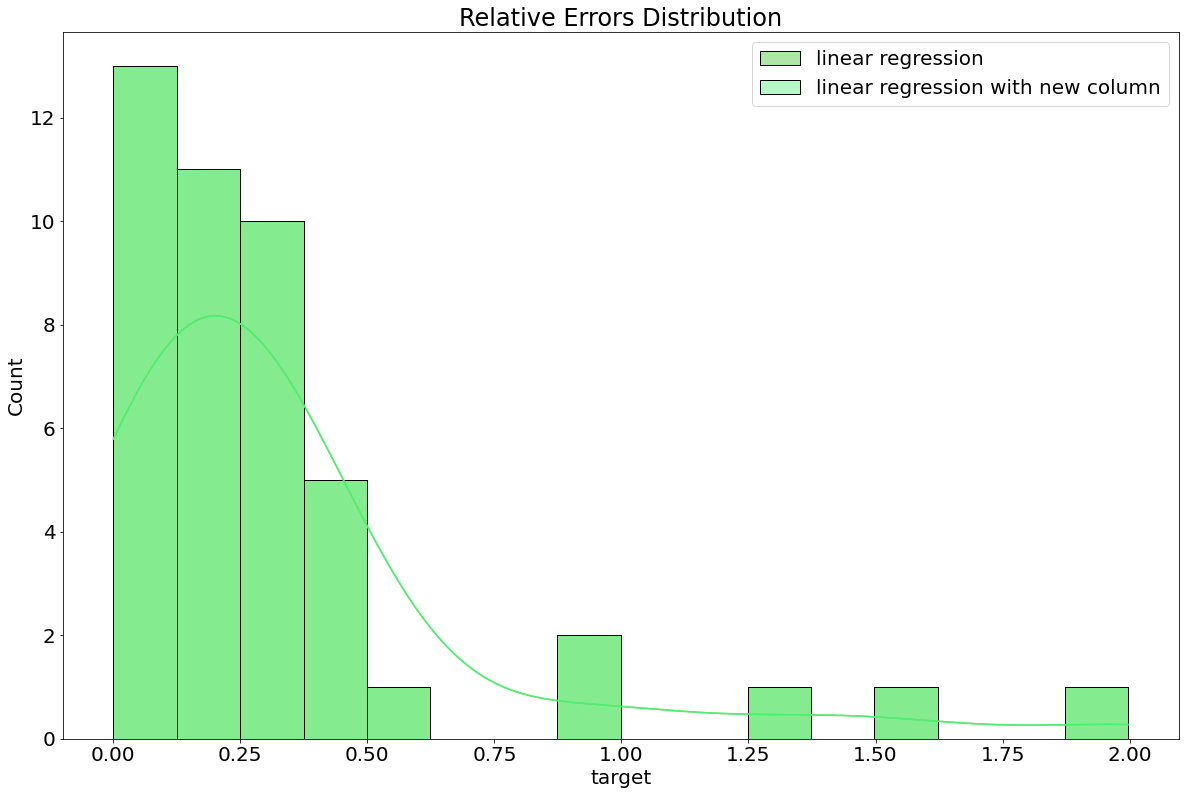

In [25]:
c = np.random.uniform(0,0.5,3)

sns.histplot(err_rel_lr, alpha = 0.6, label = 'linear regression', kde = True, color = np.random.rand(3,) )
sns.histplot(err_rel_lr_corr, alpha = 0.4, label = 'linear regression with new column', kde = True, color = np.random.rand(3,))

plt.legend()
plt.title('Relative Errors Distribution')

As seen above, the addition of the new column does not bring about any kind of change, in fact the two graphs overlap.

Text(0.5, 1.0, 'Relative Errors Distribution')

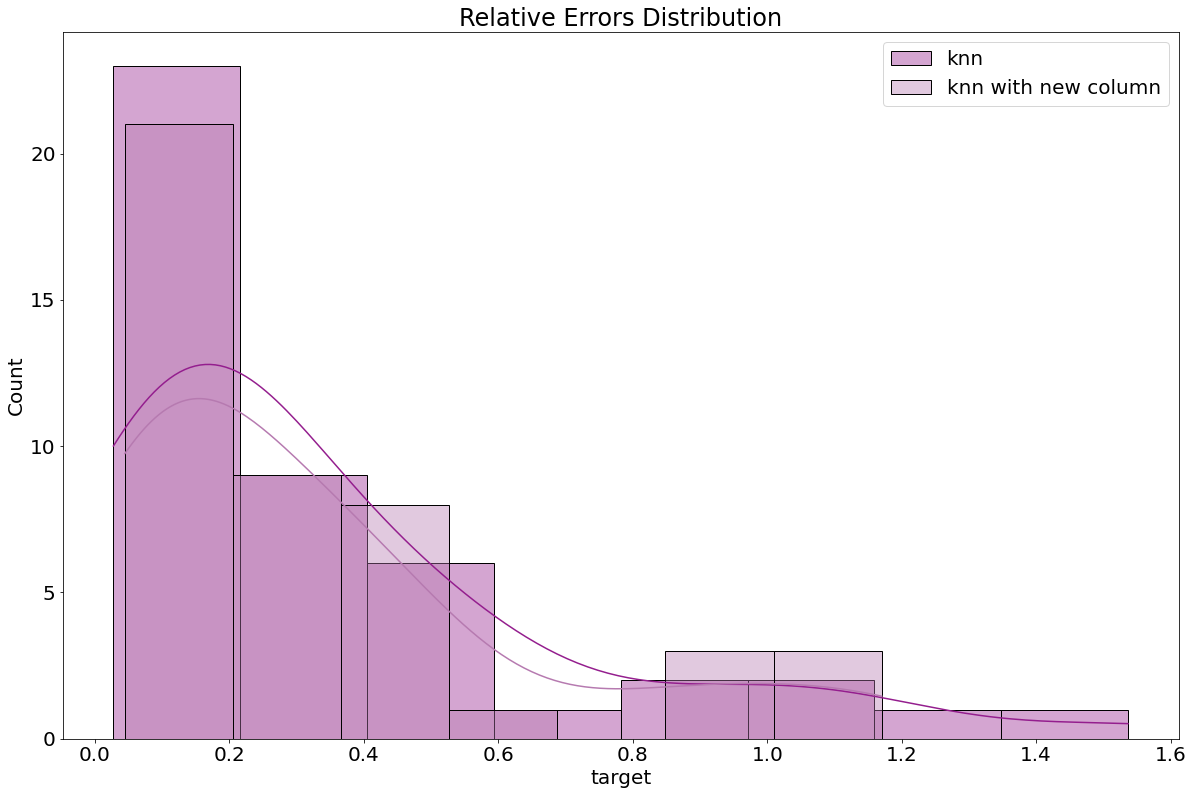

In [26]:
c = np.random.uniform(0,0.5,3)

sns.histplot(err_rel_knn, alpha = 0.4, label = 'knn', kde = True, color = np.random.rand(3,))
sns.histplot(err_rel_knn_corr, alpha = 0.4, label = 'knn with new column', kde = True, color = np.random.rand(3,))

plt.legend()
plt.title('Relative Errors Distribution')

The graph shows how the addition of the new column leads to a slight deterioration

Text(0.5, 1.0, 'Relative Errors Distribution')

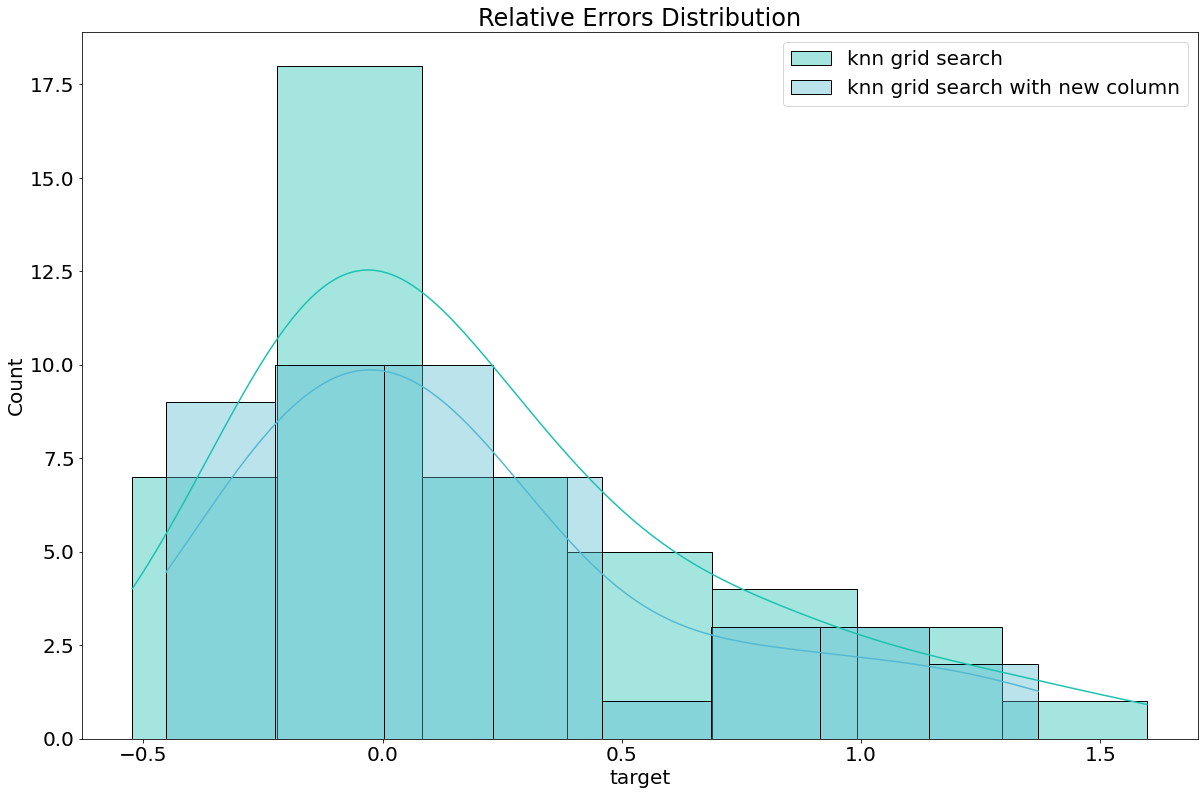

In [27]:
c = np.random.uniform(0,0.5,3)

sns.histplot(err_knn, alpha = 0.4, label = 'knn grid search', kde = True, color = np.random.rand(3,))
sns.histplot(err_knn_corr, alpha = 0.4, label = 'knn grid search with new column', kde = True, color = np.random.rand(3,))

plt.legend()
plt.title('Relative Errors Distribution')

Also in this case the addition of the new column leads to a slight deterioration

Text(0.5, 1.0, 'Relative Errors Distribution')

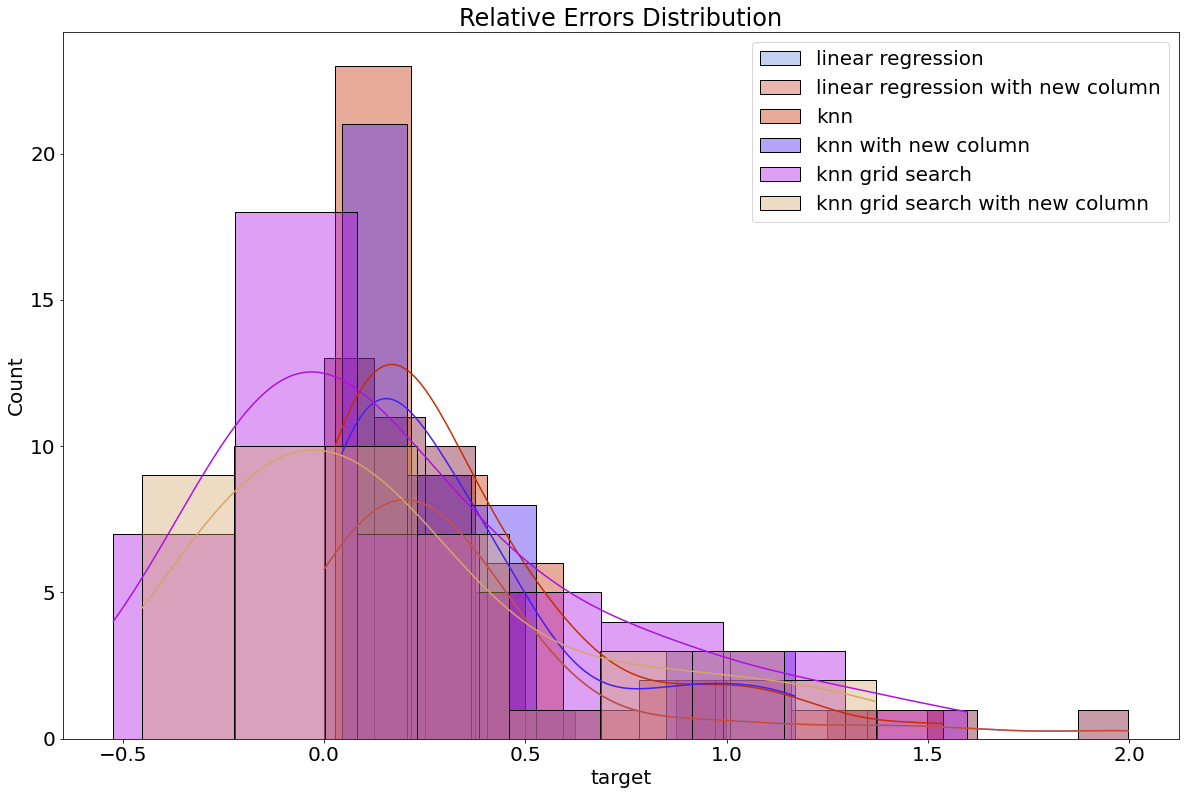

In [28]:
c = np.random.uniform(0,0.5,3)

sns.histplot(err_rel_lr, alpha = 0.4, label = 'linear regression', kde = True, color = np.random.rand(3,) )
sns.histplot(err_rel_lr_corr, alpha = 0.4, label = 'linear regression with new column', kde = True, color = np.random.rand(3,))
sns.histplot(err_rel_knn, alpha = 0.4, label = 'knn', kde = True, color = np.random.rand(3,))
sns.histplot(err_rel_knn_corr, alpha = 0.4, label = 'knn with new column', kde = True, color = np.random.rand(3,))
sns.histplot(err_knn, alpha = 0.4, label = 'knn grid search', kde = True, color = np.random.rand(3,))
sns.histplot(err_knn_corr, alpha = 0.4, label = 'knn grid search with new column', kde = True, color = np.random.rand(3,))

plt.legend()
plt.title('Relative Errors Distribution')

In conclusion, the knn model is the most accurate for prediction, adding the column does not seem to significantly improve the models.

In [29]:
data = pd.DataFrame(dt['data'], columns = dt['feature_names'])
data['target'] = dt['target']

In [30]:
data.drop('s2', axis = 1, inplace = True)
data.drop('s4', axis = 1, inplace = True)

In [31]:
X=data[data.columns[0:-1]]
y=data[data.columns[-1]]

#split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

df_train=pd.DataFrame(X_train, columns = data.columns[0:-1])
df_train['target']=y_train

df_test=pd.DataFrame(X_test, columns = data.columns[0:-1])
df_test['target']=y_test

<AxesSubplot:>

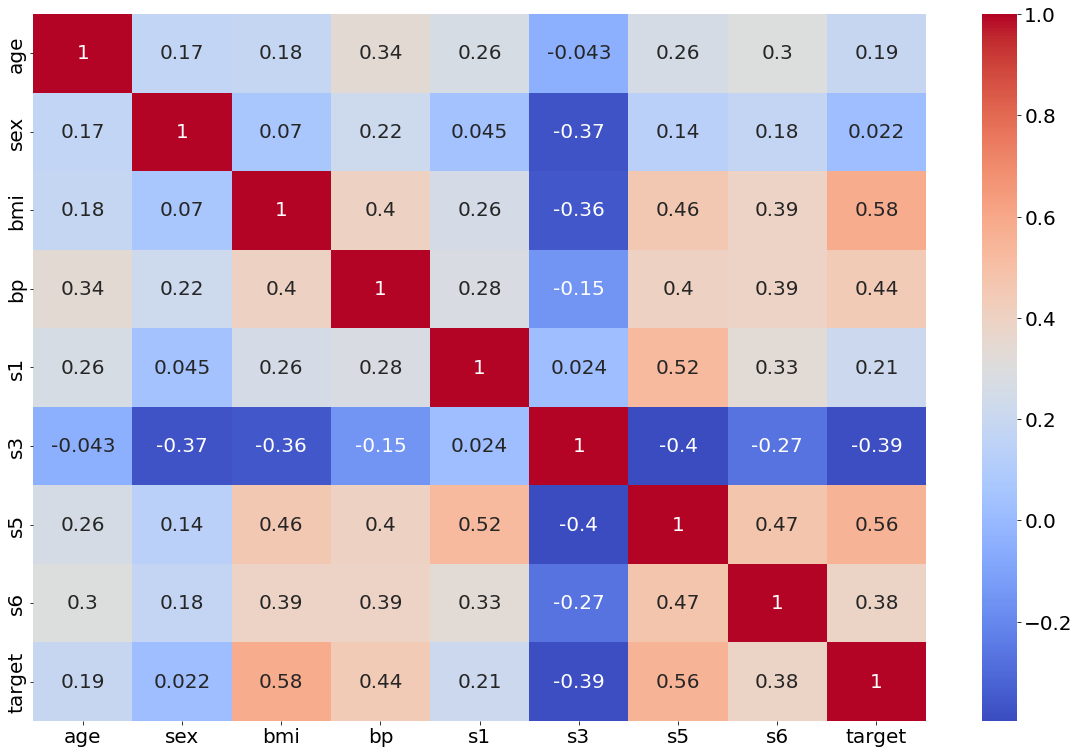

In [32]:
sns.heatmap(df_train.corr(), annot = True, cmap = 'coolwarm')

In [33]:
k=[i for i in range(1,5)]
scores=[]
degree=[]
rel_err=[]
mean_sqrt=[]
ass_err=[]
for i in k:
    poly = PolynomialFeatures(degree = i, include_bias = False)
    X_train_ = poly.fit_transform(X_train)
    X_test_ = poly.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_, y_train)
    y_pred=model.predict(X_test_)
    rel=np.mean(abs((y_pred-y_test)/y_test))
    ass=np.mean(abs((y_pred-y_test)))
    mean=np.sqrt(mean_squared_error(y_pred, y_test))
    scores.append(model.score(X_test_, y_test))
    rel_err.append(rel)
    mean_sqrt.append(mean)
    ass_err.append(ass)
    degree.append(i)
    
print(f"\nConsidering a linear polynomial {degree[np.argmax(scores)]}\na score of {np.round(max(scores),3)*100}% is obtained" )

print(f"\nTo get the minimum error, equal to {np.round(min(rel_err),2)*100}%,\n(calculated as the average of relative errors)\nshould be used a polynomial of degree {degree[np.argmin(rel_err)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(mean_sqrt),2)},\n(calculated using the mean square error)\nshould be used a polynomial of degree {degree[np.argmin(mean_sqrt)]}" )

print(f"\nTo get the minimum error, equal to {np.round(min(ass_err),2)},\n(calculated using the mean absolute error)\nshould be used a polynomial of degree {degree[np.argmin(ass_err)]}" )


Considering a linear polynomial 2
a score of 58.3% is obtained

To get the minimum error, equal to 31.0%,
(calculated as the average of relative errors)
should be used a polynomial of degree 2

To get the minimum error, equal to 50.51,
(calculated using the mean square error)
should be used a polynomial of degree 2

To get the minimum error, equal to 38.43,
(calculated using the mean absolute error)
should be used a polynomial of degree 2


In [34]:
k=[i for i in range(2,30) if i%2!=0]
dist=['euclidean','cosine','manhattan']

The best choice is using the distance cosine,
with k=9and a score equal to 68.31%

The relative error is equal to 32.0%
and the mean square error is equal to 44.03,
The absolut error is equal to 34.46


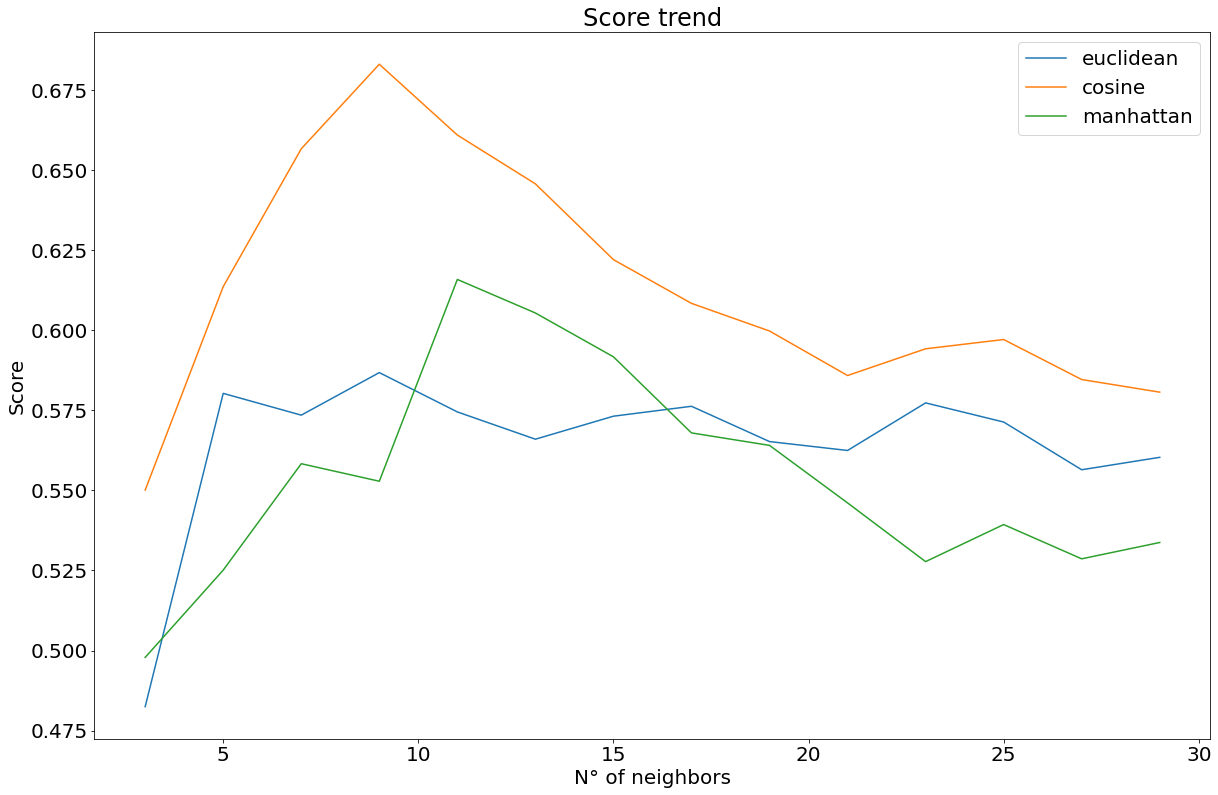

In [35]:
best_scores=[]
best_rel_err=[]
best_mean_sqrt=[]
best_k=[]
best_ass_err=[]
for j in dist:
    scores=[]
    rel_err=[]
    mean_sqrt=[]
    ass_err=[]
    for i in k:
        knn = KNeighborsRegressor(n_neighbors=i, metric=j)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test, y_test))
        y_pred=knn.predict(X_test)
        rel=np.mean(abs((y_pred-y_test)/y_test))
        mean=np.sqrt(mean_squared_error(y_pred, y_test))
        ass=np.mean(abs((y_pred-y_test)))
        rel_err.append(rel)
        mean_sqrt.append(mean)
        ass_err.append(ass)
    
    best_scores.append(np.max(scores))
    best_rel_err.append(np.min(rel_err))
    best_ass_err.append(np.min(ass_err))
    best_mean_sqrt.append(np.min(mean_sqrt))
    best_k.append(k[np.argmax(scores)])
    plt.plot(k,scores,label=j)
    
plt.xlabel('N° of neighbors')  # Add an x-label to the axes.
plt.ylabel('Score')  # Add a y-label to the axes.
plt.title("Score trend")
plt.legend()

print(f"The best choice is using the distance {dist[np.argmax(best_scores)]},\nwith k={best_k[np.argmax(best_scores)]}and a score equal to {np.round(np.max(best_scores)*100,2)}%")
print(f"\nThe relative error is equal to {np.round(min(best_rel_err),2)*100}%\nand the mean square error is equal to {np.round(min(best_mean_sqrt),2)},\nThe absolut error is equal to {np.round(min(best_ass_err),2)}")